In [104]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.initializers import he_normal

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
%%time
train_Bag = np.load("train_Bag.npy")
train_Hips = np.load("train_Hips.npy")
train_Torso = np.load("train_Torso.npy")
train_Hand = np.load("train_Hand.npy")

In [ ]:
columns = ['Label', 'Acc_x', 'Acc_y', 'Acc_z', 'Glo_Acc_x', 'Glo_Acc_y',
       'Glo_Acc_z', 'Gra_x', 'Gra_y', 'Gra_z', 'Gyr_x', 'Gyr_y', 'Gyr_z',
       'LAcc_x', 'LAcc_y', 'LAcc_z', 'Mag_x', 'Mag_y', 'Mag_z', 'Ori_w',
       'Ori_x', 'Ori_y', 'Ori_z', 'Pressure']
columns = dict(zip(columns, [tmp for tmp in range(len(columns))]))
columns

In [ ]:
def Acc_plot(index, start_index, count=10):
#     count = 300
    tt = np.linspace(0, 100, count * 500)
    plt.figure(figsize=(24, 4))
    bag = train_Bag[start_index].copy()
    hips = train_Hips[start_index].copy()
    torso = train_Torso[start_index].copy()
    hand = train_Hand[start_index].copy()

    for i in range(start_index+1, start_index + count):
        bag = np.vstack((bag, train_Bag[i].copy()))
        hips = np.vstack((hips, train_Hips[i].copy()))
        torso = np.vstack((torso, train_Torso[i].copy()))
        hand = np.vstack((hand, train_Hand[i].copy()))
    print(bag.shape)
    
    bag[:, index] = np.abs(np.fft.fft(bag[:, index]))
    hips[:, index] = np.abs(np.fft.fft(hips[:, index]))
    torso[:, index] = np.abs(np.fft.fft(torso[:, index]))
    hand[:, index] = np.abs(np.fft.fft(hand[:, index]))
    
    plt.plot(tt, bag[:, index], color='blue')
    plt.plot(tt, hips[:, index], color='red')
    plt.plot(tt, torso[:, index], color='green')
    plt.plot(tt, torso[:, index], color='yellow')
    plt.xlabel("Frequency[Hz]", fontsize=18)
    plt.ylabel("Amplitude", fontsize=18)
    plt.xlim(0.1, 50)
#     plt.ylim(0, 30 ** 8)
    plt.show()
    print(bag[0, 0])

In [ ]:
Acc_plot(1, 18000, 1)

In [ ]:
train_Bag.shape

In [ ]:
%%time
train_Bag_glo_accel_xy = np.sqrt(np.square(train_Bag[:, :, 4].copy()) + np.square(train_Bag[:, :, 5].copy()))
np.save("train_Bag_glo_accel_xy", train_Bag_glo_accel_xy)

In [ ]:
train_Bag_glo_accel_xy.shape

In [ ]:
%%time

np.save("train_Bag_glo_z_mean", np.mean(train_Bag[:, :, 6].copy(), axis=1))

from mutagen.mp3 import MP3 as mp3
import pygame
import time



In [ ]:
 np.mean(train_Bag_glo_accel_xy.copy(), axis=1).shape

In [ ]:
np.save("train_Bag_pressure_change", train_Bag[:, -1, -1] - train_Bag[:, 0, -1])

filename = '../mac_poteto.mp3' #再生したいmp3ファイル
pygame.mixer.init()
pygame.mixer.music.load(filename) #音源を読み込み
mp3_length = mp3(filename).info.length #音源の長さ取得
pygame.mixer.music.play(1) #再生開始。1の部分を変えるとn回再生(その場合は次の行の秒数も×nすること)
time.sleep(mp3_length + 0.25) #再生開始後、音源の長さだけ待つ(0.25待つのは誤差解消)
pygame.mixer.music.stop() #音源の長さ待ったら再生停止

In [ ]:
def save_npy(x, hold_position):
    x_glo_accel_xy = np.sqrt(np.square(x[:, :, 4]) + np.square(x[:, :, 5]))
    np.save("train_" + hold_position + "_glo_accel_xy", x_glo_accel_xy)
    np.save("train_" + hold_position + "_glo_accel_xy_mean", np.mean(x_glo_accel_xy.copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_xy_var", np.var(x_glo_accel_xy.copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_z_mean", np.mean(x[:, :, 6].copy(), axis=1))
    np.save("train_" + hold_position + "_glo_accel_z_var", np.var(x[:, :, 6].copy(), axis=1))
    np.save("train_" + hold_position + "_pressure_change", x[:, -1, -1] - x[:, 0, -1])

In [ ]:
%%time
save_npy(train_Hips.copy(), "Hips")
save_npy(train_Torso.copy(), "Torso")
save_npy(train_Hand.copy(), "Hand")

filename = '../mac_poteto.mp3' #再生したいmp3ファイル
pygame.mixer.init()
pygame.mixer.music.load(filename) #音源を読み込み
mp3_length = mp3(filename).info.length #音源の長さ取得
pygame.mixer.music.play(1) #再生開始。1の部分を変えるとn回再生(その場合は次の行の秒数も×nすること)
time.sleep(mp3_length + 0.25) #再生開始後、音源の長さだけ待つ(0.25待つのは誤差解消)
pygame.mixer.music.stop() #音源の長さ待ったら再生停止

In [ ]:
def save_columns(x, start_index, end_index, file_name):
    np.save(file_name, x[:, :, start_index:end_index])

In [ ]:
%%time
save_columns(train_Bag, 0, 1, "train_Bag/train_Bag_Label")
save_columns(train_Bag, 1, 4, "train_Bag/train_Bag_Acc")
save_columns(train_Bag, 4, 7, "train_Bag/train_Bag_Glo_Acc")
save_columns(train_Bag, 7, 10, "train_Bag/train_Bag_Gra")
save_columns(train_Bag, 10, 13, "train_Bag/train_Bag_Gyr")
save_columns(train_Bag, 13, 16, "train_Bag/train_Bag_LAcc")
save_columns(train_Bag, 16, 19, "train_Bag/train_Bag_Mag")
save_columns(train_Bag, 19, 23, "train_Bag/train_Bag_Ori")
save_columns(train_Bag, 23, 24, "train_Bag/train_Bag_Pressure")

In [ ]:
%%time
save_columns(train_Hips, 0, 1, "train_Hips/train_Hips_Label")
save_columns(train_Hips, 1, 4, "train_Hips/train_Hips_Acc")
save_columns(train_Hips, 4, 7, "train_Hips/train_Hips_Glo_Acc")
save_columns(train_Hips, 7, 10, "train_Hips/train_Hips_Gra")
save_columns(train_Hips, 10, 13, "train_Hips/train_Hips_Gyr")
save_columns(train_Hips, 13, 16, "train_Hips/train_Hips_LAcc")
save_columns(train_Hips, 16, 19, "train_Hips/train_Hips_Mag")
save_columns(train_Hips, 19, 23, "train_Hips/train_Hips_Ori")
save_columns(train_Hips, 23, 24, "train_Hips/train_Hips_Pressure")

In [ ]:
%%time
save_columns(train_Torso, 0, 1, "train_Torso/train_Torso_Label")
save_columns(train_Torso, 1, 4, "train_Torso/train_Torso_Acc")
save_columns(train_Torso, 4, 7, "train_Torso/train_Torso_Glo_Acc")
save_columns(train_Torso, 7, 10, "train_Torso/train_Torso_Gra")
save_columns(train_Torso, 10, 13, "train_Torso/train_Torso_Gyr")
save_columns(train_Torso, 13, 16, "train_Torso/train_Torso_LAcc")
save_columns(train_Torso, 16, 19, "train_Torso/train_Torso_Mag")
save_columns(train_Torso, 19, 23, "train_Torso/train_Torso_Ori")
save_columns(train_Torso, 23, 24, "train_Torso/train_Torso_Pressure")

In [ ]:
%%time
save_columns(train_Hand, 0, 1, "train_Hand/train_Hand_Label")
save_columns(train_Hand, 1, 4, "train_Hand/train_Hand_Acc")
save_columns(train_Hand, 4, 7, "train_Hand/train_Hand_Glo_Acc")
save_columns(train_Hand, 7, 10, "train_Hand/train_Hand_Gra")
save_columns(train_Hand, 10, 13, "train_Hand/train_Hand_Gyr")
save_columns(train_Hand, 13, 16, "train_Hand/train_Hand_LAcc")
save_columns(train_Hand, 16, 19, "train_Hand/train_Hand_Mag")
save_columns(train_Hand, 19, 23, "train_Hand/train_Hand_Ori")
save_columns(train_Hand, 23, 24, "train_Hand/train_Hand_Pressure")

In [ ]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import pandas as pd

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
train_Bag = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Glo_LAcc_ver2.npy")
train_Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1])

train_Bag.shape, train_Label.shape

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(train_Bag[train_Label == 1][19600, :, 2], 'b', label="still")
plt.plot(train_Bag[train_Label == 2][12000, :, 2], 'g', label="walking")
plt.plot(train_Bag[train_Label == 3][500, :, 2], 'r', label="run")
plt.plot(train_Bag[train_Label == 4][709, :, 2], 'yellow', label="bike")
plt.legend()

In [ ]:
def fft(x):
    x = np.round(x, 5)
    x = np.sqrt(np.square(x[:, 0]) + np.square(x[:, 1]) + np.square(x[:, 2]))
    x = np.fft.fft(x - x.mean())
    x = np.square(np.abs(x))
    return x[:x.shape[0]//2]

In [ ]:
def fft2(x):
    x = np.round(x, 5)
    x = np.fft.fft(x - x.mean())
    x = np.abs(x)
    return x[:x.shape[0]//2]

In [ ]:
plt.figure(figsize=(24, 8))

# tt = np.linspace(0, 100, 500)
plt.plot(fft2(fft2(fft(train_Bag[train_Label == 1][23600, :]))), 'b', label="still")
plt.plot(fft2(fft2(fft(train_Bag[train_Label == 2][1200, :]))), 'g', label="walking")
# plt.plot(fft2(fft2(fft(train_Bag[train_Label == 3][590, :]))), 'r', label="run")
plt.plot(fft2(fft2(fft(train_Bag[train_Label == 4][2105, :]))), 'yellow', label="bike")
# plt.xlim(0, 50)
# plt.ylim(0, 0.5 * 10**7)
plt.legend()

In [146]:
def load_npy(hold_position):
    file_path = "../Output/train/train_" + hold_position + "/train_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_ver2_amplitude_frequency_range5Hz.npy")
    norm_mag_FFT = np.load(file_path + "_glo_mag_norm_ver2_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT, norm_mag_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT, norm_mag_FFT
    return result

In [147]:
train_Bag = np.delete(load_npy("Bag"), 120845, 0)
train_Hips = np.delete(load_npy("Hips"), 120845, 0)
train_Torso = np.delete(load_npy("Torso"), 120845, 0)
train_Hand = np.delete(load_npy("Hand"), 120845, 0)

train_Bag.shape

(195490, 72)

In [148]:
train_Label = np.delete(np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0], 120845, 0).reshape([-1])
train_Label.shape

(195490,)

In [149]:
def load_npy(hold_position):
    file_path = "../Output/validation/validation_" + hold_position + "/validation_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_ver2_amplitude_frequency_range5Hz.npy")
    norm_mag_FFT = np.load(file_path + "_glo_mag_norm_ver2_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT, norm_mag_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT, norm_mag_FFT
    return result

In [150]:
validation_Bag = load_npy("Bag")
validation_Hips = load_npy("Hips")
validation_Torso = load_npy("Torso")
validation_Hand = load_npy("Hand")

validation_Bag.shape

(28685, 72)

In [151]:
validation_Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1])
validation_Label.shape

(28685,)

In [173]:
np.max(train_Bag[:, 51]), np.min(train_Bag[:, 51])

(4.800000000000001, 0.2)

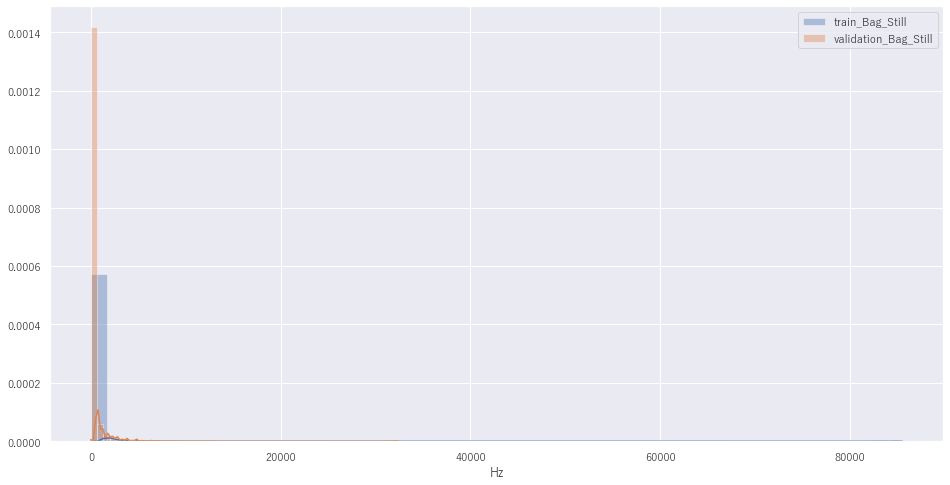

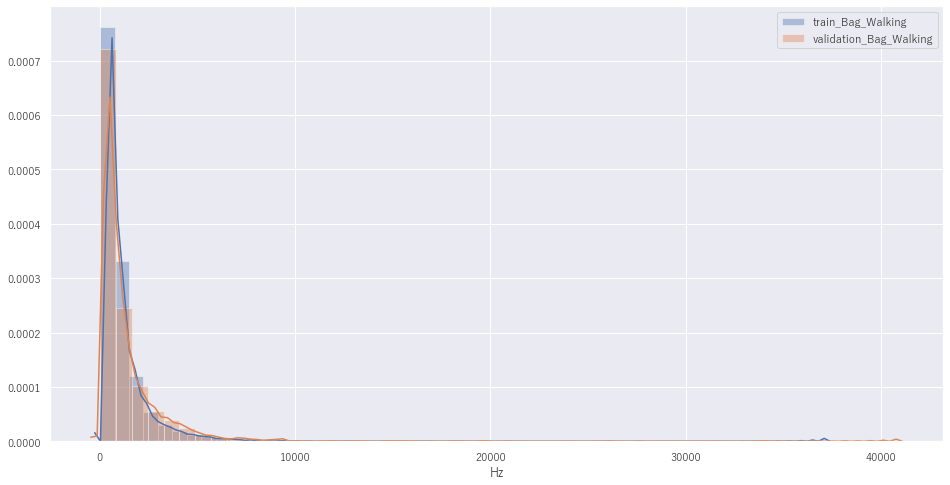

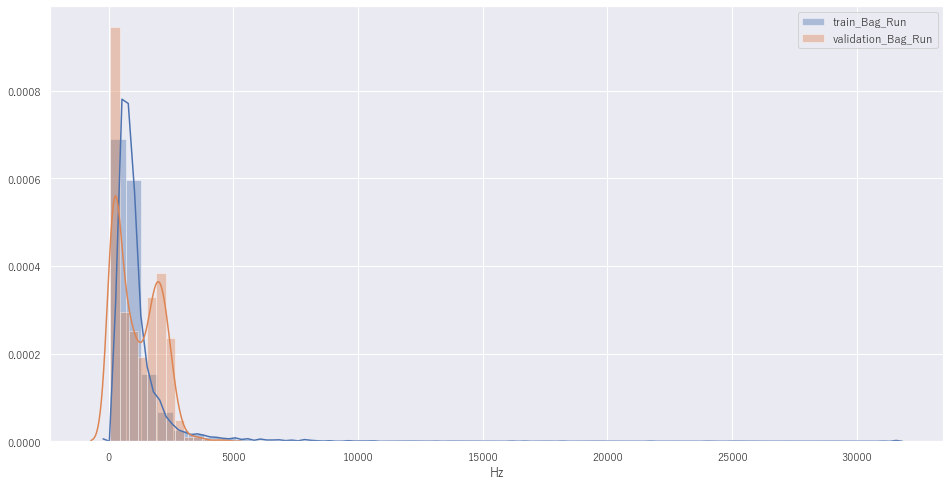

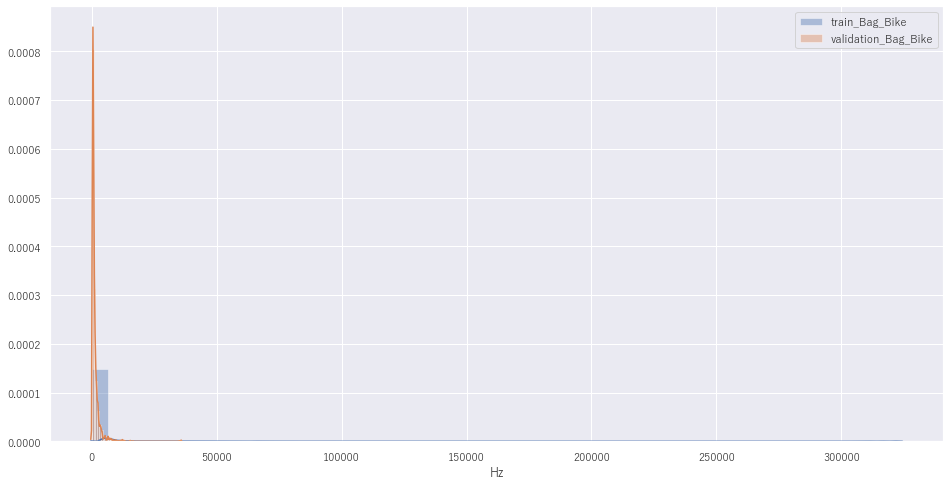

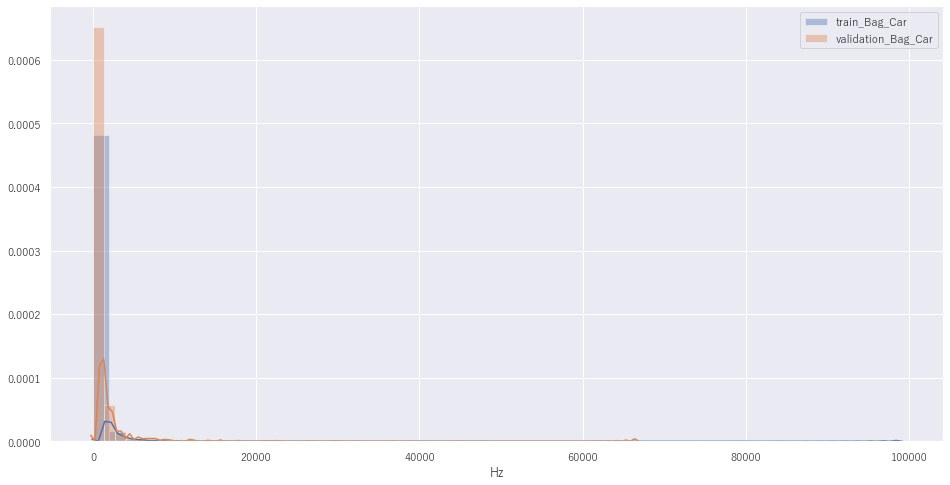

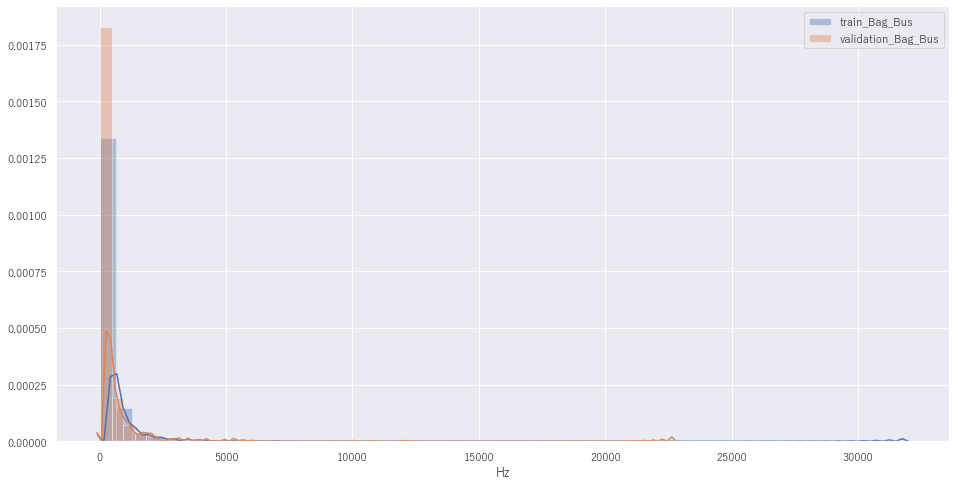

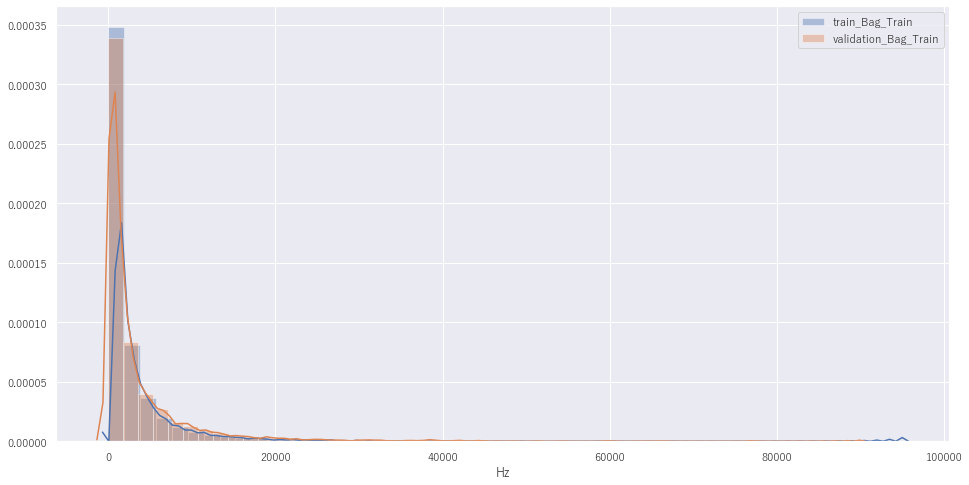

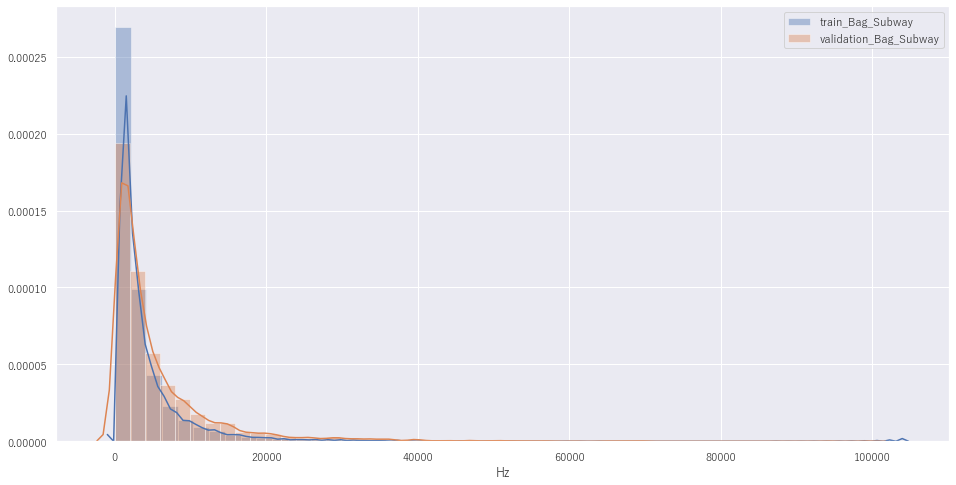

In [175]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for i in range(8):
    plt.figure(figsize=(16, 8))
    draw_index = i + 1 
    sns.distplot(train_Bag[train_Label == draw_index][:, 50], label="train_Bag_" + class_names[draw_index-1])
    sns.distplot(validation_Bag[validation_Label == draw_index][:, 50], label="validation_Bag_"  + class_names[draw_index-1])
    plt.xlabel("Hz")
    plt.legend()
#     plt.savefig("../Output/figure/" + class_names[i] + "_0_5Hz")

In [122]:
np.max(train_Bag[:, 7])

9.8

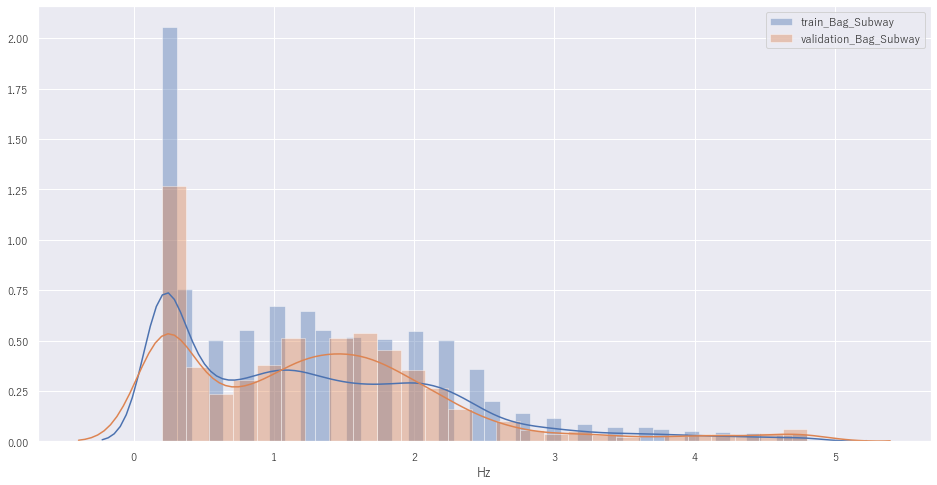

In [170]:
plt.figure(figsize=(16, 8))
draw_index = 8
sns.distplot(train_Bag[train_Label == draw_index][:, 7], label="train_Bag_" + class_names[draw_index-1])
sns.distplot(validation_Bag[validation_Label == draw_index][:, 7], label="validation_Bag_"  + class_names[draw_index-1])
plt.xlabel("Hz")
plt.legend()
plt.savefig("../Output/figure/" + class_names[draw_index - 1] + "_0_5Hz")

In [184]:
def train_Bag_pressure():
    result = np.load("../Data/センサ別npyファイル/train/train_Torso/train_Torso_Pressure.npy")
    result = result.max(axis=1) - result.min(axis=1)
    return result

def val_Bag_pressure():
    result = np.load("../Data/センサ別npyファイル/validation/validation_Torso/validation_Torso_Pressure.npy").reshape([-1, 500, 1])
    result = result.max(axis=1) - result.min(axis=1)
    return result

In [185]:
tBag_pre = train_Bag_pressure()
vBag_pre = val_Bag_pressure()

tBag_pre.shape, vBag_pre.shape

((195491, 1), (28685, 1))

(0, 2)

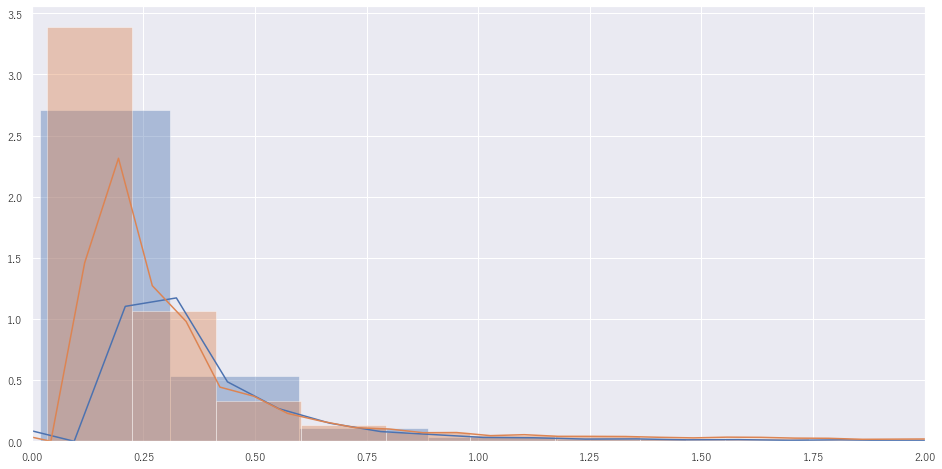

In [186]:
plt.figure(figsize=(16, 8))
sns.distplot(tBag_pre)
sns.distplot(vBag_pre)
plt.xlim(0, 2)